# E-Commerce market place company

In [787]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling as pf
import warnings
warnings.filterwarnings('ignore')

In [788]:
os.chdir("D:\AnalytiXlabs\PYTHON\CASE-STUDIES\Python Foundation End to End Case Study E-Commerce Analytics Project")

In [789]:
#Importing & reading all the dataframes.

orders = pd.read_csv('./ORDERS.csv')
order_review = pd.read_csv('./ORDER_REVIEW_RATINGS.csv')
order_item = pd.read_csv('./ORDER_ITEMS.csv')
order_payments = pd.read_csv('./ORDER_PAYMENTS.csv')
products = pd.read_csv('./PRODUCTS.csv')
seller = pd.read_csv('./SELLERS.csv')
geo_location = pd.read_csv('./GEO_LOCATION.csv')
customer = pd.read_csv('./CUSTOMERS.csv')

In [790]:
merge_1 = pd.merge(orders,customer,left_on='customer_id',right_on='customer_id')
merge_1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh


In [791]:
merge_2 = pd.merge(merge_1, order_payments, left_on='order_id',right_on='order_id')
merge_2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1,UPI,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,1,credit_card,3,179.12


In [792]:
merge_3 = pd.merge(merge_2,order_review, left_on='order_id',right_on='order_id')
merge_3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/2017 0:00,10/12/2017 3:43
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/2017 0:00,10/12/2017 3:43
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/2017 0:00,10/12/2017 3:43
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1,UPI,1,141.46,8d5266042046a06655c8db133d120ba5,4,8/8/2018 0:00,8/8/2018 18:37
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,8/18/2018 0:00,8/22/2018 19:07


In [793]:
merge_4 = pd.merge(order_item, products, left_on='product_id',right_on='product_id')
merge_4.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,7/5/2017 2:44,55.9,17.96,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5/23/2018 10:56,64.9,18.33,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/7/2017 18:55,58.9,16.17,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/16/2017 22:05,58.9,13.29,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [794]:
merge_5 = pd.merge(merge_4, seller, left_on='seller_id', right_on='seller_id')
merge_5.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,Serilingampalle,Andhra Pradesh
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,7/5/2017 2:44,55.9,17.96,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,Serilingampalle,Andhra Pradesh
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5/23/2018 10:56,64.9,18.33,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,Serilingampalle,Andhra Pradesh
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/7/2017 18:55,58.9,16.17,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,Serilingampalle,Andhra Pradesh
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/16/2017 22:05,58.9,13.29,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,Serilingampalle,Andhra Pradesh


In [795]:
merge_6 =  pd.merge(merge_5,geo_location, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
merge_6.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,Cool_Stuff,58.0,598.0,...,9.0,14.0,27277,Serilingampalle,Andhra Pradesh,27277,-22.498183,-44.123614,Serilingampalle,Andhra Pradesh
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,7/5/2017 2:44,55.9,17.96,Cool_Stuff,58.0,598.0,...,9.0,14.0,27277,Serilingampalle,Andhra Pradesh,27277,-22.498183,-44.123614,Serilingampalle,Andhra Pradesh
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5/23/2018 10:56,64.9,18.33,Cool_Stuff,58.0,598.0,...,9.0,14.0,27277,Serilingampalle,Andhra Pradesh,27277,-22.498183,-44.123614,Serilingampalle,Andhra Pradesh
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/7/2017 18:55,58.9,16.17,Cool_Stuff,58.0,598.0,...,9.0,14.0,27277,Serilingampalle,Andhra Pradesh,27277,-22.498183,-44.123614,Serilingampalle,Andhra Pradesh
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/16/2017 22:05,58.9,13.29,Cool_Stuff,58.0,598.0,...,9.0,14.0,27277,Serilingampalle,Andhra Pradesh,27277,-22.498183,-44.123614,Serilingampalle,Andhra Pradesh


In [796]:
finalized_data = pd.merge(merge_3, merge_6, left_on='order_id', right_on='order_id')
finalized_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.0,13.0,9350,Chhuikhadan,Chhattisgarh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.0,13.0,9350,Chhuikhadan,Chhattisgarh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.0,13.0,9350,Chhuikhadan,Chhattisgarh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,af07308b275d755c9edb36a90c618231,47813,...,13.0,19.0,31570,Anantapur,Andhra Pradesh,31570,-19.810119,-43.984727,Anantapur,Andhra Pradesh
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.0,21.0,14840,Freelandgunj,Gujarat,14840,-21.362358,-48.232976,Freelandgunj,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118045,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,da62f9e57a76d978d02ab5362c509660,11722,...,10.0,40.0,17602,Mancherial,Andhra Pradesh,17602,-21.935321,-50.497562,Mancherial,Andhra Pradesh
118046,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,90.0,22.0,8290,Akkarampalle,Andhra Pradesh,8290,-23.551013,-46.448489,Akkarampalle,Andhra Pradesh
118047,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,20.0,20.0,37175,Dalurband,West Bengal,37175,-20.944706,-45.827098,Dalurband,West Bengal
118048,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,20.0,20.0,37175,Dalurband,West Bengal,37175,-20.944706,-45.827098,Dalurband,West Bengal


In [797]:
# Merged all dataframes into final_data variable.

In [798]:
finalized_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [849]:
#Changing the data-type of datetime variables.

finalized_data['order_purchase_timestamp'] = pd.to_datetime(finalized_data.order_purchase_timestamp)
finalized_data['order_delivered_carrier_date'] = pd.to_datetime(finalized_data.order_delivered_carrier_date)
finalized_data['order_delivered_customer_date'] = pd.to_datetime(finalized_data.order_delivered_customer_date)
finalized_data['order_approved_at'] =  pd.to_datetime(finalized_data.order_approved_at)
finalized_data['order_estimated_delivery_date'] = pd.to_datetime(finalized_data.order_estimated_delivery_date)

finalized_data['review_creation_date'] = pd.to_datetime(finalized_data.review_creation_date)
finalized_data['review_answer_timestamp'] = pd.to_datetime(finalized_data.review_answer_timestamp)

finalized_data['shipping_limit_date'] = pd.to_datetime(finalized_data.shipping_limit_date)

In [850]:
# Changed the appropriate column names.

finalized_data = finalized_data.rename(columns={'product_name_lenght' : 'product_name_length'})
finalized_data = finalized_data.rename(columns={'product_description_lenght' : 'product_description_length'})

In [ ]:
finalized_data.drop(['geolocation_lat', 'geolocation_lng'], axis=1, inplace=True)

In [ ]:
#Variable reduction if it's not use in further data pre-processing.

finalized_data.drop(['product_name_length','product_description_length','product_photos_qty',
                     'product_weight_g','product_length_cm','product_height_cm','product_width_cm'], axis=1, inplace=True)

In [ ]:
finalized_data.dtypes

In [ ]:
# Find-out missing values & drop it.

finalized_data.isna().sum()

In [ ]:
finalized_data.dropna(inplace=True)

In [806]:
finalized_data.duplicated().sum()

0

In [809]:
finalized_data.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
review_id                                object
review_score                              int64
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
order_item_id                           

In [810]:
finalized_data.shape

(112235, 33)

### 1. Perform Detailed exploratory analysis
#### a) Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…) 

In [847]:
total_revenue = (finalized_data.price+finalized_data.freight_value).sum()
print("Total Revenue generated = ",total_revenue)

total_quantity = finalized_data.order_id.count()
print("Total Quantity = ",total_quantity)

total_products = finalized_data.product_id.nunique()
print("Total Products = ",total_products)

total_categories = finalized_data.product_category_name.nunique()
print("Total Categories = ",total_categories)

total_sellers = finalized_data.seller_id.nunique()
print("Total Sellers = ",total_sellers)

total_locations = finalized_data.geolocation_zip_code_prefix.nunique()
print("Total Locations = ",total_locations)

#total_channels = finalized_data.

total_payment_method = finalized_data.payment_type.nunique()
print("Total Payment Method = ",total_payment_method)

Total Revenue generated =  15577642.419999998
Total Quantity =  112235
Total Products =  31023
Total Categories =  71
Total Sellers =  2850
Total Locations =  2072
Total Payment Method =  4


#### b) Understanding how many new customers acquired every month

In [812]:
finalized_data['Monthly'] = finalized_data['order_delivered_customer_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))


In [813]:
finalized_data['Yearly'] = finalized_data['order_delivered_customer_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [814]:
new_cust_mnthly = finalized_data.groupby(['Yearly','Monthly'])[['customer_unique_id']].nunique()
new_cust_mnthly

customer_unique_id
Yearly Monthly                      
2016   December                    4
       November                   59
       October                   204
2017   April                    1740
       August                   4094
       December                 6882
       February                 1275
       January                   261
       July                     3287
       June                     3044
       March                    2261
       May                      3529
       November                 4476
       October                  4300
       September                3764
2018   April                    7560
       August                   8073
       February                 5557
       January                  6294
       July                     5665
       June                     6666
       March                    6480
       May                      6925
       October                     3
       September                  54

#### c) Understand the retention of customers on month on month basis

In [815]:
custs_months = finalized_data.groupby(['Yearly','Monthly'])[['customer_unique_id']].count()

cust_retained = custs_months-new_cust_mnthly

cust_retained

customer_unique_id
Yearly Monthly                      
2016   December                    0
       November                   23
       October                    50
2017   April                     345
       August                   1008
       December                 1543
       February                  332
       January                    79
       July                      771
       June                      719
       March                     547
       May                       760
       November                 1058
       October                  1046
       September                 816
2018   April                    1503
       August                   1418
       February                 1165
       January                  1157
       July                     1008
       June                     1451
       March                    1594
       May                      1382
       October                     0
       September                   3

#### d) How the revenues from existing/new customers on month on month basis

In [816]:
finalized_data['Total_Revenue'] = finalized_data.price + finalized_data.freight_value

In [817]:
finalized_data.groupby(["Yearly","Monthly"])[["Total_Revenue"]].sum()

Total_Revenue
Yearly Monthly                 
2016   December          960.85
       November        12596.33
       October         35805.21
2017   April          303309.38
       August         647422.23
       December      1102274.06
       February       229229.20
       January         42142.12
       July           543043.53
       June           516888.28
       March          399103.67
       May            611428.96
       November       760280.22
       October        768565.09
       September      682105.06
2018   April         1290183.63
       August        1367288.88
       February       890039.49
       January        988785.36
       July           969420.96
       June          1190288.34
       March         1035366.20
       May           1178249.73
       October           347.95
       September       12517.69

#### e) Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

#### sales by category

<AxesSubplot:xlabel='product_category_name'>

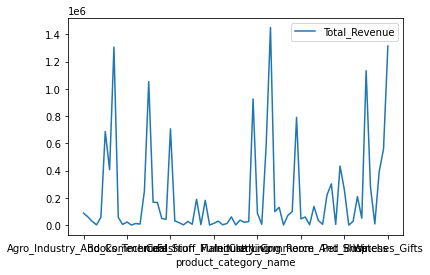

In [818]:
finalized_data.groupby(['product_category_name'])[['Total_Revenue']].sum().plot(kind='line')

#### sales by location

<AxesSubplot:ylabel='geolocation_state'>

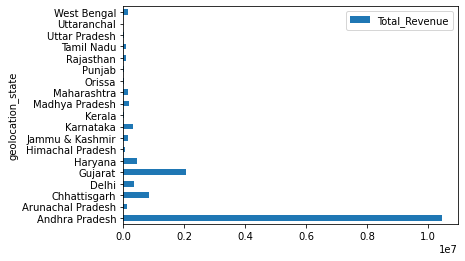

In [819]:
finalized_data.groupby(['geolocation_state'])[['Total_Revenue']].sum().plot(kind='barh')

#### sales by month

<AxesSubplot:xlabel='Monthly'>

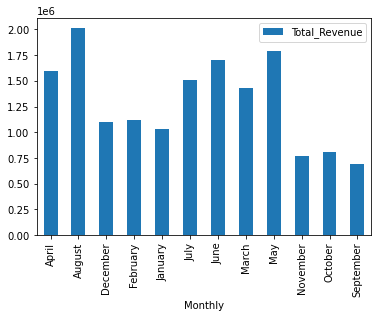

In [820]:
finalized_data.groupby(['Monthly'])[['Total_Revenue']].sum().plot(kind='bar')

#### sales by payment method

<AxesSubplot:xlabel='payment_type'>

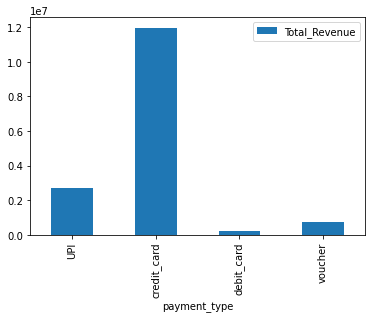

In [821]:
finalized_data.groupby(['payment_type'])[['Total_Revenue']].sum().plot(kind='bar')

#### f) Popular Products by month, seller, state, category.

#### popular products by month

In [822]:
finalized_data[["product_id","Yearly","Monthly"]].groupby(["product_id","Yearly","Monthly"]).count()

Empty DataFrame
Columns: []
Index: [(00066f42aeeb9f3007548bb9d3f33c38, 2018, June), (00088930e925c41fd95ebfe695fd2655, 2017, December), (0009406fd7479715e4bef61dd91f2462, 2018, January), (000b8f95fcb9e0096488278317764d19, 2018, August), (000d9be29b5207b54e86aa1b1ac54872, 2018, April), (0011c512eb256aa0dbbb544d8dffcf6e, 2017, December), (00126f27c813603687e6ce486d909d01, 2017, October), (00126f27c813603687e6ce486d909d01, 2017, September), (001795ec6f1b187d37335e1c4704762e, 2017, December), (001795ec6f1b187d37335e1c4704762e, 2017, November), (001795ec6f1b187d37335e1c4704762e, 2018, January), (001b237c0e9bb435f2e54071129237e9, 2018, August), (001b72dfd63e9833e8c02742adf472e3, 2017, August), (001b72dfd63e9833e8c02742adf472e3, 2017, December), (001b72dfd63e9833e8c02742adf472e3, 2017, February), (001b72dfd63e9833e8c02742adf472e3, 2017, July), (001b72dfd63e9833e8c02742adf472e3, 2017, March), (001b72dfd63e9833e8c02742adf472e3, 2017, November), (001b72dfd63e9833e8c02742adf472e3, 2017, October), (001b72dfd63e9833e8c02742adf472e3, 2017, September), (001c5d71ac6ad696d22315953758fa04, 2017, February), (00210e41887c2a8ef9f791ebc780cc36, 2017, July), (00210e41887c2a8ef9f791ebc780cc36, 2017, June), (00210e41887c2a8ef9f791ebc780cc36, 2017, May), (002159fe700ed3521f46cfcf6e941c76, 2017, August), (002159fe700ed3521f46cfcf6e941c76, 2017, December), (002159fe700ed3521f46cfcf6e941c76, 2017, May), (002159fe700ed3521f46cfcf6e941c76, 2018, April), (002159fe700ed3521f46cfcf6e941c76, 2018, August), (002159fe700ed3521f46cfcf6e941c76, 2018, March), (002159fe700ed3521f46cfcf6e941c76, 2018, May), (0021a87d4997a48b6cef1665602be0f5, 2017, August), (00250175f79f584c14ab5cecd80553cd, 2017, April), (00250175f79f584c14ab5cecd80553cd, 2017, October), (00250175f79f584c14ab5cecd80553cd, 2018, August), (00250175f79f584c14ab5cecd80553cd, 2018, February), (00250175f79f584c14ab5cecd80553cd, 2018, January), (00250175f79f584c14ab5cecd80553cd, 2018, June), (002552c0663708129c0019cc97552d7d, 2018, July), (002959d7a0b0990fe2d69988affcbc80, 2018, February), (002af88741ba70c7b5cf4e4a0ad7ef85, 2017, August), (002c6dab60557c48cfd6c2222ef7fd76, 2018, April), (002d4ea7c04739c130bb74d7e7cd1694, 2018, May), (002ec297b1b00fb9dde7ee6ac24b6771, 2018, April), (0030026a6ddb3b2d1d4bc225b4b4c4da, 2017, December), (0030e635639c898b323826589761cf23, 2018, June), (0030e635639c898b323826589761cf23, 2018, March), (003128f981470c3e5a2e7445e4a771cd, 2018, August), (0036bb031e69d915cd384d1b3838b5d3, 2017, March), (003938452c98ff9ab28e9e7b4bfe97ab, 2018, August), (003962cb74a8b43cf1034fed541a76f0, 2017, May), (003a31970fea14fffe92ac856b8a9b97, 2018, June), (003c0b8f6580c850bd2e32044d2ac307, 2017, November), (003dbcabcf8e3231de657c7d9f9a5eba, 2017, June), (004154251837f6ac124ad4374b3a8148, 2017, November), (0042f1a9a7e0edd1400c6cd0fda065f8, 2018, February), (0043c62d00db47eff6a6bc4cf6bfaeda, 2018, February), (0043d1a25ef08fb6f41b8fa6f91742ab, 2017, December), (0044d70d4e53450c0fbb8255446a797b, 2018, March), (004552d98c5d3653af8b4dbe8def0048, 2017, December), (004636c889c7c3dad6631f136b7fa082, 2018, April), (004636c889c7c3dad6631f136b7fa082, 2018, August), (004636c889c7c3dad6631f136b7fa082, 2018, May), (004ffcbfa5aac82212a95bc972ea8a85, 2017, September), (005030ef108f58b46b78116f754d8d38, 2017, December), (005030ef108f58b46b78116f754d8d38, 2017, November), (005030ef108f58b46b78116f754d8d38, 2017, October), (005030ef108f58b46b78116f754d8d38, 2018, April), (005030ef108f58b46b78116f754d8d38, 2018, August), (005030ef108f58b46b78116f754d8d38, 2018, February), (005030ef108f58b46b78116f754d8d38, 2018, January), (005030ef108f58b46b78116f754d8d38, 2018, March), (005030ef108f58b46b78116f754d8d38, 2018, May), (005c6b24cc96dca3e2c01e824401030e, 2018, February), (0060b415594c5e1200324ef1a18493c4, 2017, August), (00636f9286f69c9f1bdabe76e670fb50, 2017, February), (00636f9286f69c9f1bdabe76e670fb50, 2017, March), (006508eabcc19ae52ed87323124ad0e9, 2018, June), (006619bbed68b000c8ba3f8725d5409e, 2018, March), (0067f9

#### popular products by seller

In [823]:
finalized_data[["product_id","seller_state"]].groupby(["product_id","seller_state"]).count()

,
product_id,seller_state
00066f42aeeb9f3007548bb9d3f33c38,Andhra Pradesh
00088930e925c41fd95ebfe695fd2655,Gujarat
0009406fd7479715e4bef61dd91f2462,Gujarat
000b8f95fcb9e0096488278317764d19,Gujarat
000d9be29b5207b54e86aa1b1ac54872,Andhra Pradesh
...,...
fff6177642830a9a94a0f2cba5e476d1,Andhra Pradesh
fff81cc3158d2725c0655ab9ba0f712c,Andhra Pradesh
fff9553ac224cec9d15d49f5a263411f,Andhra Pradesh


#### popular products by state 

In [824]:
finalized_data[["product_id","geolocation_state"]].groupby(["product_id","geolocation_state"]).count()

,
product_id,geolocation_state
00066f42aeeb9f3007548bb9d3f33c38,Andhra Pradesh
00088930e925c41fd95ebfe695fd2655,Gujarat
0009406fd7479715e4bef61dd91f2462,Gujarat
000b8f95fcb9e0096488278317764d19,Gujarat
000d9be29b5207b54e86aa1b1ac54872,Andhra Pradesh
...,...
fff6177642830a9a94a0f2cba5e476d1,Andhra Pradesh
fff81cc3158d2725c0655ab9ba0f712c,Andhra Pradesh
fff9553ac224cec9d15d49f5a263411f,Andhra Pradesh


#### popular products by category

In [825]:
finalized_data[["product_id","Yearly","Monthly"]].groupby(["product_id","Yearly","Monthly"]).count()

Empty DataFrame
Columns: []
Index: [(00066f42aeeb9f3007548bb9d3f33c38, 2018, June), (00088930e925c41fd95ebfe695fd2655, 2017, December), (0009406fd7479715e4bef61dd91f2462, 2018, January), (000b8f95fcb9e0096488278317764d19, 2018, August), (000d9be29b5207b54e86aa1b1ac54872, 2018, April), (0011c512eb256aa0dbbb544d8dffcf6e, 2017, December), (00126f27c813603687e6ce486d909d01, 2017, October), (00126f27c813603687e6ce486d909d01, 2017, September), (001795ec6f1b187d37335e1c4704762e, 2017, December), (001795ec6f1b187d37335e1c4704762e, 2017, November), (001795ec6f1b187d37335e1c4704762e, 2018, January), (001b237c0e9bb435f2e54071129237e9, 2018, August), (001b72dfd63e9833e8c02742adf472e3, 2017, August), (001b72dfd63e9833e8c02742adf472e3, 2017, December), (001b72dfd63e9833e8c02742adf472e3, 2017, February), (001b72dfd63e9833e8c02742adf472e3, 2017, July), (001b72dfd63e9833e8c02742adf472e3, 2017, March), (001b72dfd63e9833e8c02742adf472e3, 2017, November), (001b72dfd63e9833e8c02742adf472e3, 2017, October), (001b72dfd63e9833e8c02742adf472e3, 2017, September), (001c5d71ac6ad696d22315953758fa04, 2017, February), (00210e41887c2a8ef9f791ebc780cc36, 2017, July), (00210e41887c2a8ef9f791ebc780cc36, 2017, June), (00210e41887c2a8ef9f791ebc780cc36, 2017, May), (002159fe700ed3521f46cfcf6e941c76, 2017, August), (002159fe700ed3521f46cfcf6e941c76, 2017, December), (002159fe700ed3521f46cfcf6e941c76, 2017, May), (002159fe700ed3521f46cfcf6e941c76, 2018, April), (002159fe700ed3521f46cfcf6e941c76, 2018, August), (002159fe700ed3521f46cfcf6e941c76, 2018, March), (002159fe700ed3521f46cfcf6e941c76, 2018, May), (0021a87d4997a48b6cef1665602be0f5, 2017, August), (00250175f79f584c14ab5cecd80553cd, 2017, April), (00250175f79f584c14ab5cecd80553cd, 2017, October), (00250175f79f584c14ab5cecd80553cd, 2018, August), (00250175f79f584c14ab5cecd80553cd, 2018, February), (00250175f79f584c14ab5cecd80553cd, 2018, January), (00250175f79f584c14ab5cecd80553cd, 2018, June), (002552c0663708129c0019cc97552d7d, 2018, July), (002959d7a0b0990fe2d69988affcbc80, 2018, February), (002af88741ba70c7b5cf4e4a0ad7ef85, 2017, August), (002c6dab60557c48cfd6c2222ef7fd76, 2018, April), (002d4ea7c04739c130bb74d7e7cd1694, 2018, May), (002ec297b1b00fb9dde7ee6ac24b6771, 2018, April), (0030026a6ddb3b2d1d4bc225b4b4c4da, 2017, December), (0030e635639c898b323826589761cf23, 2018, June), (0030e635639c898b323826589761cf23, 2018, March), (003128f981470c3e5a2e7445e4a771cd, 2018, August), (0036bb031e69d915cd384d1b3838b5d3, 2017, March), (003938452c98ff9ab28e9e7b4bfe97ab, 2018, August), (003962cb74a8b43cf1034fed541a76f0, 2017, May), (003a31970fea14fffe92ac856b8a9b97, 2018, June), (003c0b8f6580c850bd2e32044d2ac307, 2017, November), (003dbcabcf8e3231de657c7d9f9a5eba, 2017, June), (004154251837f6ac124ad4374b3a8148, 2017, November), (0042f1a9a7e0edd1400c6cd0fda065f8, 2018, February), (0043c62d00db47eff6a6bc4cf6bfaeda, 2018, February), (0043d1a25ef08fb6f41b8fa6f91742ab, 2017, December), (0044d70d4e53450c0fbb8255446a797b, 2018, March), (004552d98c5d3653af8b4dbe8def0048, 2017, December), (004636c889c7c3dad6631f136b7fa082, 2018, April), (004636c889c7c3dad6631f136b7fa082, 2018, August), (004636c889c7c3dad6631f136b7fa082, 2018, May), (004ffcbfa5aac82212a95bc972ea8a85, 2017, September), (005030ef108f58b46b78116f754d8d38, 2017, December), (005030ef108f58b46b78116f754d8d38, 2017, November), (005030ef108f58b46b78116f754d8d38, 2017, October), (005030ef108f58b46b78116f754d8d38, 2018, April), (005030ef108f58b46b78116f754d8d38, 2018, August), (005030ef108f58b46b78116f754d8d38, 2018, February), (005030ef108f58b46b78116f754d8d38, 2018, January), (005030ef108f58b46b78116f754d8d38, 2018, March), (005030ef108f58b46b78116f754d8d38, 2018, May), (005c6b24cc96dca3e2c01e824401030e, 2018, February), (0060b415594c5e1200324ef1a18493c4, 2017, August), (00636f9286f69c9f1bdabe76e670fb50, 2017, February), (00636f9286f69c9f1bdabe76e670fb50, 2017, March), (006508eabcc19ae52ed87323124ad0e9, 2018, June), (006619bbed68b000c8ba3f8725d5409e, 2018, March), (0067f9

#### g) Popular categories by state, month

#### By state 

In [826]:
popular_prod = finalized_data.groupby(['product_category_name'])[['customer_state']].count()

popular_categories = popular_prod.apply(lambda x: x.sort_values(ascending=False).head())

popular_categories

,customer_state
product_category_name,
Bed_Bath_Table,11789
Health_Beauty,9736
Sports_Leisure,8591
Furniture_Decor,8561
Computers_Accessories,7839


#### By month

In [827]:
popular_prod1 = finalized_data.groupby(['product_category_name'])[['Monthly']].max()

popular_categories1 = popular_prod1.apply(lambda x: x.sort_values(ascending=False).head())

popular_categories1

,Monthly
product_category_name,
Agro_Industry_And_Commerce,September
Home_Appliances,September
Industry_Commerce_And_Business,September
Housewares,September
Home_Construction,September


#### h) List top 10 most expensive products sorted by price

In [828]:
trends_price = finalized_data.groupby(['product_category_name'])[['price']].count()

top_ten_exp = trends_price.apply(lambda x: x.sort_values(ascending=False).head(10))

top_ten_exp

,price
product_category_name,
Bed_Bath_Table,11789
Health_Beauty,9736
Sports_Leisure,8591
Furniture_Decor,8561
Computers_Accessories,7839
Housewares,7069
Watches_Gifts,6072
Telephony,4570
Garden_Tools,4446


### 2. Performing Customers/sellers Segmentation a. Divide the customers into groups based on the revenue generated 

In [829]:
cust_on_rev = finalized_data.groupby(['customer_id'])[['Total_Revenue']].sum()

#### profitable customers

In [830]:
Profitable_Customers = cust_on_rev[cust_on_rev.Total_Revenue>0]
Profitable_Customers

,Total_Revenue
customer_id,
00012a2ce6f8dcda20d059ce98491703,114.74
000161a058600d5901f007fab4c27140,67.41
0001fd6190edaaf884bcaf3d49edf079,195.42
0002414f95344307404f0ace7a26f1d5,179.35
000379cdec625522490c315e70c7a9fb,107.01
...,...
fffcb937e9dd47a13f05ecb8290f4d3e,91.91
fffecc9f79fd8c764f843e9951b11341,244.08
fffeda5b6d849fbd39689bb92087f431,63.13


#### Non Profitable Customers

In [831]:
Non_Profitable_Customers = cust_on_rev[cust_on_rev.Total_Revenue<0]
Non_Profitable_Customers

,Total_Revenue
customer_id,


### on seller

In [832]:
seller_on_rev =  finalized_data.groupby('seller_id')[['Total_Revenue']].sum()

#### profitable sellers

In [833]:
Profi_Seller = seller_on_rev[seller_on_rev.Total_Revenue>0]
Profi_Seller

,Total_Revenue
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,2748.06
001cca7ae9ae17fb1caed9dfb1094831,33384.11
002100f778ceb8431b7a1020ff7ab48f,2108.41
004c9cd9d87a3c30c522c48c4fc07416,22228.30
00720abe85ba0859807595bbf045a33b,1323.48
...,...
ffc470761de7d0232558ba5e786e57b7,2087.80
ffdd9f82b9a447f6f8d4b91554cc7dd3,2884.73
ffeee66ac5d5a62fe688b9d26f83f534,2259.55


#### Non Profitable Sellers

In [834]:
Non_Profi_Seller = seller_on_rev[seller_on_rev.Total_Revenue<0]
Non_Profi_Seller

,Total_Revenue
seller_id,


### 4. Payment Behaviour 

#### a) how customers are paying ?

In [835]:
paying_type = list(finalized_data.payment_type.unique())
paying_type

['credit_card', 'voucher', 'UPI', 'debit_card']

#### b) Which payment channels are used by most customers?

In [836]:
finalized_data.pivot_table(values="product_id", index="payment_type", aggfunc='count').sort_values("product_id",ascending=False).head(1)

,product_id
payment_type,
credit_card,82813


### 5. Customer satisfaction towards category & product

#### a. Which categories (top 10) are maximum rated & minimum rated?

##### Maximum rated

In [837]:
finalized_data.groupby("product_category_name")[["review_score"]].sum().sort_values("review_score",ascending=False).head(10)

,review_score
product_category_name,
Bed_Bath_Table,45886
Health_Beauty,40609
Sports_Leisure,35670
Furniture_Decor,33756
Computers_Accessories,31185
Housewares,29038
Watches_Gifts,24612
Telephony,18210
Garden_Tools,18095


##### Minium rated

In [838]:
finalized_data.groupby("product_category_name")[["review_score"]].sum().sort_values("review_score").head(10)

,review_score
product_category_name,
Security_And_Services,5
Fashion_Childrens_Clothes,35
La_Cuisine,53
Cds_Dvds_Musicals,65
Arts_And_Craftmanship,99
Home_Comfort_2,105
Fashion_Sport,121
Diapers_And_Hygiene,125
Flowers,139


#### b. Which products (top10) are maximum rated & minimum rated

##### Maximum rated

In [839]:
finalized_data.groupby("product_id")[["review_score"]].sum().sort_values("review_score", ascending=False).head(10)

,review_score
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,2136
99a4788cb24856965c36a24e339b6058,2013
422879e10f46682990de24d770e7f83d,1993
389d119b48cf3043d311335e499d9c6b,1662
368c6c730842d78016ad823897a372db,1553
53759a2ecddad2bb87a079a1f1519f73,1516
d1c427060a0f73f6b889a5c7c61f2ac4,1443
53b36df67ebb7c41585e8d54d6772e08,1365
154e7e31ebfa092203795c972e5804a6,1256


##### Minimum rated

In [840]:
finalized_data.groupby("product_id")[["review_score"]].sum().sort_values("review_score").head(10)

,review_score
product_id,
b6ae7ce782177c099c882b90df5f3d5d,1
c2d28f0e9e7925b59ea575da70e8f884,1
2af3bc8c9414aa21fdcb986aba6fe286,1
2b1e141d70cf9e03eae19784eb427c24,1
c234674e4e175c7be49f4412f97c1248,1
c221338cf5bbc53a58d3f15b3620e1f0,1
2b404a26ab8bb829250810315a2af34f,1
c1ed7eeb2ac3e40d069da245ac1d3492,1
c1e4bd7e1144f99ac576aedc324a5cb3,1


#### c. Average rating by location, seller, product, category, month etc.

##### AVG rating by location

In [841]:
finalized_data.groupby("geolocation_state")[["review_score"]].mean()

,review_score
geolocation_state,
Andhra Pradesh,4.075691
Arunachal Pradesh,4.236264
Chhattisgarh,4.176588
Delhi,4.018742
Gujarat,3.950434
Haryana,4.117754
Himachal Pradesh,4.230964
Jammu & Kashmir,4.095195
Karnataka,4.108616


##### AVG rating by seller

In [842]:
finalized_data.groupby("seller_id")[["review_score"]].mean()

,review_score
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,3.666667
001cca7ae9ae17fb1caed9dfb1094831,3.944915
002100f778ceb8431b7a1020ff7ab48f,4.086207
004c9cd9d87a3c30c522c48c4fc07416,4.143713
00720abe85ba0859807595bbf045a33b,3.653846
...,...
ffc470761de7d0232558ba5e786e57b7,4.281250
ffdd9f82b9a447f6f8d4b91554cc7dd3,4.285714
ffeee66ac5d5a62fe688b9d26f83f534,4.214286


##### AVG rating by product

In [843]:
finalized_data.groupby("product_id")[["review_score"]].mean()

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
00088930e925c41fd95ebfe695fd2655,4.0
0009406fd7479715e4bef61dd91f2462,1.0
000b8f95fcb9e0096488278317764d19,5.0
000d9be29b5207b54e86aa1b1ac54872,5.0
...,...
fff6177642830a9a94a0f2cba5e476d1,4.5
fff81cc3158d2725c0655ab9ba0f712c,4.0
fff9553ac224cec9d15d49f5a263411f,5.0


##### AVG rating by category

In [844]:
finalized_data.groupby("product_category_name")[["review_score"]].mean()

,review_score
product_category_name,
Agro_Industry_And_Commerce,4.225410
Air_Conditioning,3.993127
Art,4.020000
Arts_And_Craftmanship,4.125000
Audio,3.828496
...,...
Stationery,4.225995
Tablets_Printing_Image,4.045977
Telephony,3.984683


##### AVG rating by month

In [846]:
finalized_data.groupby(["Yearly","Monthly"])[["review_score"]].mean()

review_score
Yearly Monthly                
2016   December       3.000000
       November       3.707317
       October        3.909449
2017   April          4.077218
       August         4.257154
       December       3.966053
       February       4.293715
       January        4.211765
       July           4.160177
       June           4.169811
       March          4.186966
       May            4.113313
       November       4.089808
       October        4.124766
       September      4.194978
2018   April          3.781088
       August         4.208513
       February       3.994644
       January        3.925379
       July           4.275888
       June           4.101146
       March          3.802452
       May            4.130853
       October        4.666667
       September      2.000000

$ Finished $